# Análisis y Tratamiento de los Datos

In [0]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Cargamos el DataSet
#data = pd.read_csv("drive/My Drive/ML-Proyecto/CreditCardData.csv")
data = pd.read_csv("CreditCardData.csv")
#Vista previa de la información contenida en el DataSet.
print(data.shape)
data.head() 
data.drop("Unnamed: 0", inplace = True, axis = 1)
data.head()

(30000, 26)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
### Diccionario con equivalencias de los campos MARRIAGE, SEX, EDUCATION. 
### Tomada de https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
tags = {'MARRIAGE': {1:'Casado', 2:'Soltero', 3:'Otros'},
       'SEX': {1:'Masculino', 2:'Femenino'},
       'EDUCATION': {1:'Posgrado', 2:'Universidad', 3:'Secundaria', 4:'Otros'},
       }
print(tags)

{'MARRIAGE': {1: 'Casado', 2: 'Soltero', 3: 'Otros'}, 'SEX': {1: 'Masculino', 2: 'Femenino'}, 'EDUCATION': {1: 'Posgrado', 2: 'Universidad', 3: 'Secundaria', 4: 'Otros'}}


In [6]:
#Renombramos algunas columnas
data.rename(columns = {'default payment next month':'default'}, 
                                 inplace = True) 
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


In [7]:
#Estructura de las columnas que tiene el DataSet.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
default      30000 non-null int64
dtypes: float64

In [8]:
### Valores unicos de cada variable categórica
#cat_vars = [c for c in data if not pd.api.types.is_numeric_dtype(data[c])]
cat_vars = ["SEX", "EDUCATION", "MARRIAGE", "default" ]
#cat_vars = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6" ]

for v in cat_vars:
    print('Valores de la variable {0}: {1}'.format(v, data[v].unique()))


Valores de la variable SEX: [2 1]
Valores de la variable EDUCATION: [2 1 3 5 4 6 0]
Valores de la variable MARRIAGE: [1 2 3 0]
Valores de la variable default: [1 0]


In [9]:
#Revisamos la cantidad de datos que tiene cada una de las categorías: SEX, EDUCATION, MARRIAGE
for v in cat_vars:
  print(data[v].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
0    23364
1     6636
Name: default, dtype: int64


**Se puede apreciar que existen categorías las cuales no están descritas en el origen del DataSet (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 
Por ejemplo, para EDUCATION no se tiene el significado del valor 0,5 y 6, por lo que procederemos a incluirlos dentro de la categoría Otros.**

In [10]:
data['EDUCATION'].replace({0:3, 5:4, 6:4}, inplace = True)
data['MARRIAGE'].replace({0:3}, inplace = True)


for v in cat_vars:
      print('Valores de la variable {0}: {1}'.format(v, data[v].unique()))

Valores de la variable SEX: [2 1]
Valores de la variable EDUCATION: [2 1 3 4]
Valores de la variable MARRIAGE: [1 2 3]
Valores de la variable default: [1 0]


<Figure size 432x288 with 0 Axes>

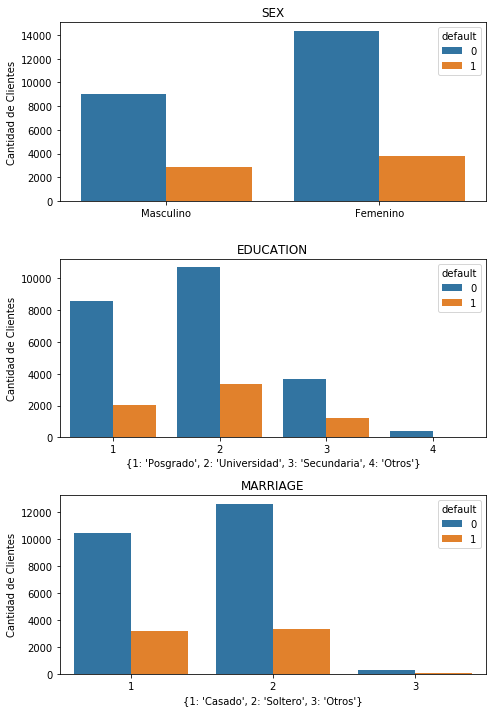

In [11]:
plt.clf()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,10))

#if sns.__version__ >= '0.9.0':
sns.countplot(x = 'SEX', hue='default', data=data, ax = axes[0])
#plt.title('Distribución de Morosidad por Sexo del Cliente ')
axes[0].set_title('SEX')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_xlabel('')
axes[0].set_xticklabels(['Masculino', 'Femenino'])
#plt.show()

#if sns.__version__ >= '0.9.0':
sns.countplot(x = 'EDUCATION', hue='default', data=data, ax = axes[1])
#plt.title('Distribución de Morosidad por Educación ')
axes[1].set_title('EDUCATION')
axes[1].set_ylabel('Cantidad de Clientes')
axes[1].set_xlabel(tags['EDUCATION'])
#plt.show()

#if sns.__version__ >= '0.9.0':
sns.countplot(x = 'MARRIAGE', hue='default', data=data, ax = axes[2])
#plt.title('Distribución de Morosidad por Estado Civil ')
axes[2].set_title('MARRIAGE')
axes[2].set_ylabel('Cantidad de Clientes')
axes[2].set_xlabel(tags['MARRIAGE'])
#plt.show()

plt.tight_layout()
plt.savefig('GraficoDataSet.png')

{'MARRIAGE': {1: 'Casado', 2: 'Soltero', 3: 'Otros'}, 'SEX': {1: 'Masculino', 2: 'Femenino'}, 'EDUCATION': {1: 'Posgrado', 2: 'Universidad', 3: 'Secundaria', 4: 'Otros'}}


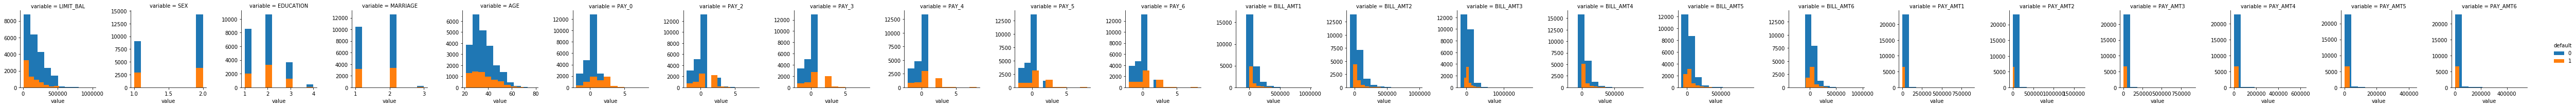

In [12]:
#Graficos
#Código adaptado de: https://www.kaggle.com/ainslie/credit-card-default-prediction-analysis
output = 'default'

cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
cols.remove( "ID")
cols.remove( output )

f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", sharex=False, sharey=False )
g = g.map( plt.hist, "value").add_legend()

print(tags)

Del gráfico anterior se puede apreciar los siguiente:


1.   Los clientes morosos (default = 1)  principalmente se concentran en aquellos cuyo LIMIT_BAL no es muy elevado.
2.   Si consideramos el sexo, notamos que los clientes del banco son en su mayoría mujeres y además solo una minoría tienen solamente hasta secundaria completa.
3. En las variables PAY_x que representan con cuanto retraso el cliente pago su cuota del mes, se aprecia que existen negativos 
4. La mayoría de clientes usaba la tarjeta de crédito de manera revolvente ( PAY_x = 0)



**Para determinar que variables influyen en el resultado de caer en mora o no usaremos pruebas de hipótesis**

# Reducción de Características

```
  # En esta oportunidad, evaluaremos la correlación existente entre las variables y la morosidad (default).
  # Para el caso de las variables categóricas como SEX, EDUCATION Y MARRIAGE usaremos la prueba de Chi Cuadrado.
  # Nos plantearemos la Hipótesis nula siguiente: "La variable Default es independiente de la variable X" Donde X puede ser EDUCATION, MARRIAGE o SEX. 
  # Luego entonces, con un p-valor menor de 5% podremos rechazar la hipótesis nula y afirmar que las variables X y Default son Dependientes y por ende, X influye en la morosidad (default)
```



In [13]:
from sklearn.feature_selection import chi2
X = data[["SEX", "EDUCATION", "MARRIAGE"]]
Y = data["default"]
chi2, pval = chi2(X,Y)
sonDependientes = pval < 0.05
print("Nivel de Significancia de 5%")
print("Variables categóricas                      :" , X.columns.values)
print("Chi Cuadrado para las variables            :" , chi2)
print("Resultado del p-valor obtenido             :", pval)
print("Las variables son dependientes con Default?:", sonDependientes)
print()
sonDependientes = pval < 0.01
print("Nivel de Significancia de 1%")
print("Variables categóricas                      :" , X.columns.values)
print("Chi Cuadrado para las variables            :" , chi2)
print("Resultado del p-valor obtenido             :", pval)
print("Las variables son dependientes con Default?:", sonDependientes)

Nivel de Significancia de 5%
Variables categóricas                      : ['SEX' 'EDUCATION' 'MARRIAGE']
Chi Cuadrado para las variables            : [ 7.14636693 10.5447729   3.98213116]
Resultado del p-valor obtenido             : [0.0075116  0.00116517 0.04598535]
Las variables son dependientes con Default?: [ True  True  True]

Nivel de Significancia de 1%
Variables categóricas                      : ['SEX' 'EDUCATION' 'MARRIAGE']
Chi Cuadrado para las variables            : [ 7.14636693 10.5447729   3.98213116]
Resultado del p-valor obtenido             : [0.0075116  0.00116517 0.04598535]
Las variables son dependientes con Default?: [ True  True False]


**El resultado de la prueba de ChiCuadrado nos dice que efectivamente, existe una relación entre la morosidad y las variables SEX, EDUCATION y MARRIAGE tomando un nivel de significancia del 5%. Sin embargo, para un p-valor de 1%, sólamente SEX y EDUCATION mantienen una correlación con la variable Default.**

In [0]:
#Separamos las variables por tipo
quantitative_vars = ["LIMIT_BAL", "AGE"]
categorical_vars = ["SEX", "EDUCATION"] #No se considera MARRIAGE dado que no está correlacionada con Default.
payment_vars = []
for i in range(1,7):
  payment_vars.append("PAY_AMT" + str( i ) )
for i in range(1,7):
  payment_vars.append("BILL_AMT" + str( i ) )

pay_vars = []
for i in [0,2,3,4,5,6]:
   pay_vars.append("PAY_" + str( i ) )

output_var = [output]

In [15]:
print(quantitative_vars)
print(categorical_vars)
print(payment_vars)
print(pay_vars)
print(output_var)

['LIMIT_BAL', 'AGE']
['SEX', 'EDUCATION']
['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
['default']


In [16]:
from sklearn.preprocessing import StandardScaler

#feature_columns = data.columns.drop('default')

X = data[quantitative_vars + pay_vars + payment_vars ].values.astype(float)
#Y = data['default'].values.astype(int)

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)


data_scaled = pd.DataFrame(X_scaled, 
                           columns = quantitative_vars + pay_vars + payment_vars)
data_scaled = pd.concat([data_scaled, data[categorical_vars + output_var]], axis = 1)
print(data_scaled.shape)
data_scaled.head()

(30000, 23)


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,SEX,EDUCATION,default
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,2,2,1
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,2,2,1
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,2,2,0
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,2,2,0
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,1,2,0


Codificamos numéricamente las variables categóricas del conjunto de datos con one-hot encoding.


In [17]:
data_scaled = pd.get_dummies(data_scaled, columns = ["SEX", "EDUCATION"])
data_scaled.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,1,0,1,0,1,0,0
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,1,0,1,0,1,0,0
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,0,0,1,0,1,0,0
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,0,0,1,0,1,0,0
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,0,1,0,0,1,0,0


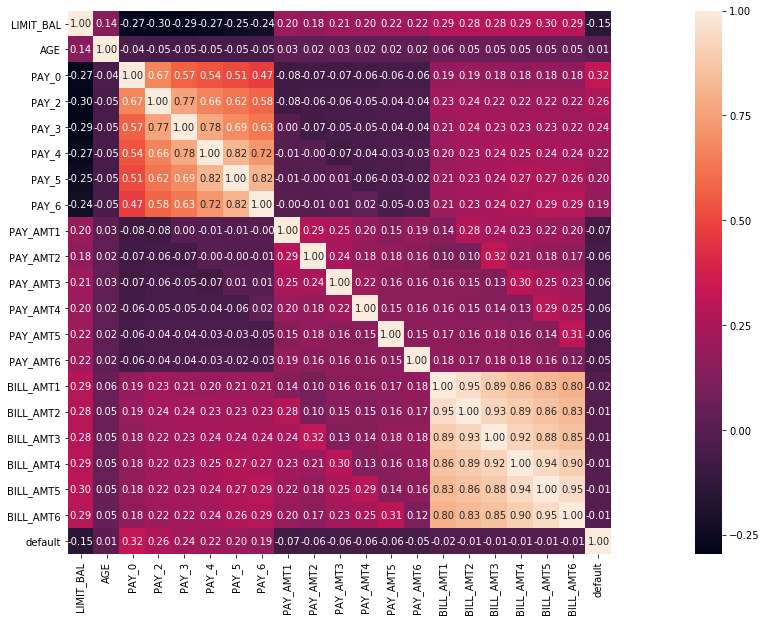

In [18]:
#Gráfico adaptado de: https://www.kaggle.com/ainslie/credit-card-default-prediction-analysis
features = quantitative_vars + pay_vars + payment_vars + output_var
corr = data_scaled[features].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".2f" )  


*   Se observa que las variables PAY_x tienen una mayor correlación con Default. 





In [19]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [20]:
### DataSet Final para entrenamiento
data_final = pd.get_dummies(data, columns = ["SEX", "EDUCATION"])
data_final.drop("ID", inplace = True, axis = 1)
data_final.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000.0,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,1,0,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,1,0,0
3,50000.0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,1,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,1,0,0


# Seleccion de Conjunto para Entrenamiento, Validación y Pruebas

Separamos el conjunto de datos en Entrenamiento (60%) Validación (20%) y Test(20%)

In [21]:
from sklearn.model_selection import train_test_split

indices = data_final.index.values

indices_trainval, indices_test = train_test_split(indices, test_size=0.2, random_state=0)
indices_train, indices_val = train_test_split(indices_trainval, test_size=0.25, random_state=0)

print(indices_train.shape) #60%
print(indices_val.shape) #20%
print(indices_test.shape) #20%

feature_columns = data.columns.drop('default')

X = data[feature_columns].values.astype(float)
y = data['default'].values.astype(int)

scaler = StandardScaler().fit(X[indices_train])
X_scaled = scaler.transform(X)

X_train = X_scaled[indices_train]
X_val = X_scaled[indices_val]
X_trainval = X_scaled[indices_trainval]
X_test = X_scaled[indices_test]

y_train = y[indices_train]
y_val = y[indices_val]
y_trainval = y[indices_trainval]
y_test = y[indices_test]

(18000,)
(6000,)
(6000,)


# PCA

In [0]:
#PCA
from sklearn.decomposition import PCA

### INICIO DE TU CÓDIGO
pca = PCA().fit(X_train)
pca_loadings = pca.components_
pca_scores_train = pca.transform(X_train)
### FIN DE TU CÓDIGO

assert np.isclose(X_train, pca_scores_train @ pca_loadings).all(), 'Error al calcular pca_scores_train o pca_loadings'

Proporción de varianza explicada por los componentes principales:
[0.27246 0.17052 0.06876 0.06261 0.04328 0.04110 0.04058 0.03808 0.03627
 0.03564 0.03051 0.02855 0.02803 0.02386 0.02156 0.01659 0.01109 0.01040
 0.00796 0.00554 0.00291 0.00176 0.00103 0.00091]


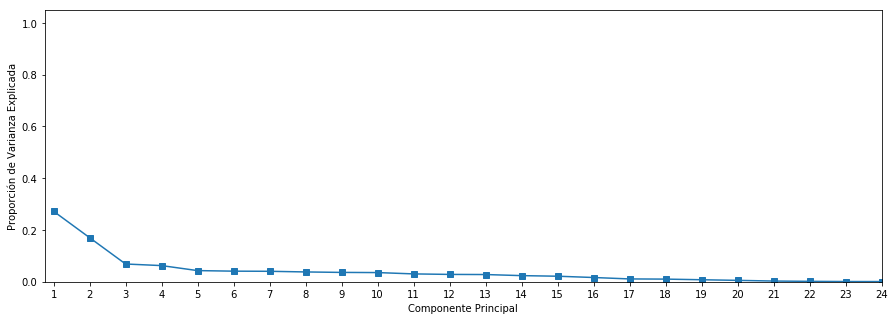


Proporción acumulada de varianza explicada por los componentes principales:
[0.27246 0.44298 0.51174 0.57435 0.61763 0.65872 0.69930 0.73739 0.77366
 0.80930 0.83981 0.86835 0.89639 0.92025 0.94181 0.95840 0.96950 0.97989
 0.98785 0.99339 0.99630 0.99806 0.99909 1.00000]



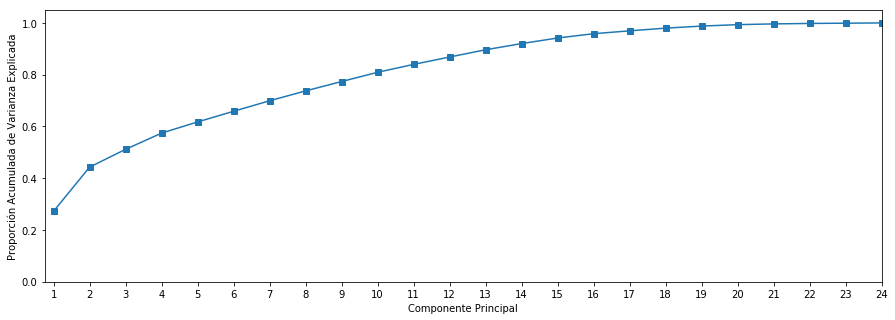

In [23]:
def plot_pca_var(pca_cum_var, label):
    num_components = pca_cum_var.shape[0]
    indices = range(1, num_components + 1)
    plt.figure(figsize=(15,5))
    plt.plot(indices, pca_cum_var, '-s')
    plt.ylabel(label)
    plt.xlabel('Componente Principal')
    plt.xlim(0.75,4.25)
    plt.ylim(0,1.05)
    plt.xticks(indices)
    plt.show()
    
### INICIO DE TU CÓDIGO
pca_cum_var = np.cumsum(pca.explained_variance_ratio_)
### FIN DE TU CÓDIGO

np.set_printoptions(formatter={'float': lambda X: "{0:0.5f}".format(X)})
print('Proporción de varianza explicada por los componentes principales:')
print(pca.explained_variance_ratio_)
plot_pca_var(pca.explained_variance_ratio_, 'Proporción de Varianza Explicada')

print()
print('Proporción acumulada de varianza explicada por los componentes principales:')
print(pca_cum_var)
print()
plot_pca_var(pca_cum_var, 'Proporción Acumulada de Varianza Explicada')

La varianza de los datos está explicada por casi todas las variables. Por ello, no reduciremos ninguna variable. Cabe resaltar que sólo hemos descargado MARRIAGE por no tener suficiente correlación con Default.

# Regresión Logística

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
def print_binary_confusion_matrix(y_true, y_pred):
  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  TN = confusion_matrix[0,0]
  FN = confusion_matrix[1,0]
  FP = confusion_matrix[0,1]
  TP = confusion_matrix[1,1]
  
  ### INICIO DE TU CÓDIGO
  exactitud = (TP+TN)/(TP+FP+TN+FN)
  precision = TP/(TP+FP)
  exhaustividad = TP/(TP+FN)
  ### FIN DE TU CÓDIGO

  print ('              +-----------------+')
  print ('              |   Predicción    |')
  print ('              +-----------------+')
  print ('              |    +   |    -   |')
  print ('+-------+-----+--------+--------+')
  print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
  print ('| real  +-----+--------+--------+')
  print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
  print ('+-------+-----+--------+--------+')
  print('Exactitud     : {:.3f}'.format(exactitud))
  print('Precisión     : {:.3f}'.format(precision))
  print('Exhaustividad : {:.3f}'.format(exhaustividad))
  print()

In [0]:
#Función para graficar la curva ROC
def plot_roc(modelo, x_test, y_test):
  probabilidades_test = modelo.predict_proba(x_test)
  #print ('Probabilidad de la clase negativa y de la clase positiva :')
  #print (probabilidades_test)
  fpr, tpr, umbrales = metrics.roc_curve(y_test, probabilidades_test[:,1])
  auc_roc = metrics.roc_auc_score(y_test, probabilidades_test[:,1])

  plt.figure(figsize=[9,7])
  plt.rcParams.update({'font.size': 10})
  plt.plot(fpr, tpr, label= ("Curva ROC (AUC = %.4f)" % auc_roc) )

  plt.xlabel("False Positive Rate", fontsize=18)
  plt.ylabel("True Positive Rate (exhaustividad)", fontsize=18)
  plt.title(("Curva ROC for Credit Card Default"), fontsize=18)
  plt.plot([1,0], [1,0], 'k--', linewidth=2)

  # ubicamos el punto más cercano a 0.5
  umbral_05 = np.argmin(np.abs(umbrales - 0.5))
  plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
           label="Umbral 0.5", fillstyle="none", c='r', mew=2)
  plt.legend(loc='best', numpoints = 1)
  plt.show()

Conjunto de entrenamiento:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    983 |   3026 |
| real  +-----+--------+--------+
|       |  -  |    392 |  13599 |
+-------+-----+--------+--------+
Exactitud     : 0.810
Precisión     : 0.715
Exhaustividad : 0.245

Conjunto de validación:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    299 |   1031 |
| real  +-----+--------+--------+
|       |  -  |    139 |   4531 |
+-------+-----+--------+--------+
Exactitud     : 0.805
Precisión     : 0.683
Exhaustividad : 0.225



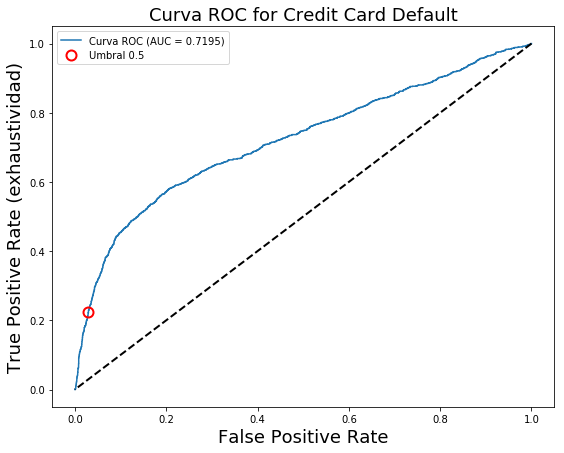

In [27]:
#Regresión Logística

modelo = LogisticRegression(solver='liblinear', random_state=0)
modelo.fit(X_train, y_train)

print('Conjunto de entrenamiento:')
print_binary_confusion_matrix(y_train, modelo.predict(X_train) )

print('Conjunto de validación:')
print_binary_confusion_matrix(y_val, modelo.predict(X_val) )

##Curva Roc para Validación
plot_roc(modelo, X_val, y_val)

In [28]:
#Usamos GridSearchCV para encontrar los mejores parámetros para el modelo.
Cs = np.logspace(-4,-1,30)
params = {'C': Cs, 
          'solver': ['liblinear'],
          'class_weight': [None, 'balanced'], 
          'penalty': ['l1', 'l2']}

#Buscaremos los mejores hyperparámetros para optimizar el Recall.
gs = GridSearchCV(modelo, params, scoring = 'roc_auc', n_jobs = -1, cv=10)
gs.fit(X_trainval, y_trainval)
print ('Best params: ', gs.best_params_)
print ('Best auc on training set: ', gs.best_score_)
print ('Best auc on val set: ', gs.score(X_val, y_val))

Best params:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best auc on training set:  0.7244947447883621
Best auc on val set:  0.7235942103653138


Luego de encontrar los mejores Hyperparámetros, entrenaremos el modelo nuevamente usando los datos de entranamiento + validación.

In [31]:
modelo_lr = gs.best_estimator_ #seteamos nuestro modelo con los mejors hyperparametros
modelo_lr.fit(X_trainval, y_trainval) #Entrenamos nuevamente el modelo con train-val

print('Conjunto de entrenamiento + Validación:')
print_binary_confusion_matrix(y_trainval, modelo_lr.predict(X_trainval))


Conjunto de entrenamiento + Validación:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   3429 |   1910 |
| real  +-----+--------+--------+
|       |  -  |   5518 |  13143 |
+-------+-----+--------+--------+
Exactitud     : 0.691
Precisión     : 0.383
Exhaustividad : 0.642



Finalmente, usamos el modelo entrenado con los datos Test.

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Matriz de Confusión
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    827 |    470 |
| real  +-----+--------+--------+
|       |  -  |   1392 |   3311 |
+-------+-----+--------+--------+
Exactitud     : 0.690
Precisión     : 0.373
Exhaustividad : 0.638



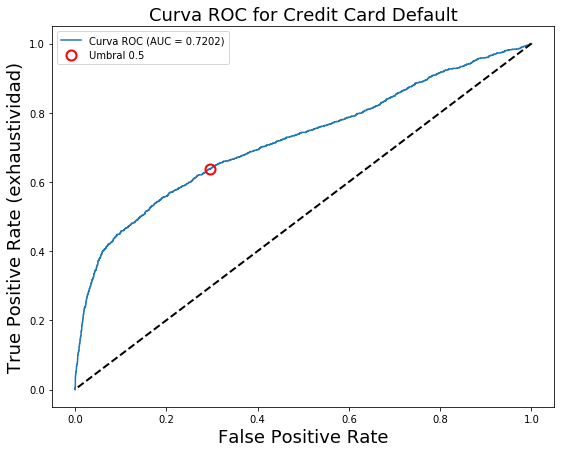

In [33]:
#Probamos el modelo con Test
print(modelo_lr) #Modelo Regresión Logística
print()
y_pred = modelo_lr.predict(X_test) #Predicciones del modelo
print()
print("Matriz de Confusión")
print_binary_confusion_matrix(y_test, y_pred) #Matriz de confusión
plot_roc(modelo_lr, X_test, y_test) #Dibujamos curva ROC

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors, n_jobs = -1)
modeloKnn1 = knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on validation set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on validation set: 0.80


### Usando Validacion cruzada

In [36]:
from sklearn.model_selection import cross_val_score

n_folds = 10

clf = KNeighborsClassifier(n_neighbors = 20, n_jobs = -1)
scores = cross_val_score(clf, X_train,y_train, cv=n_folds)
print(scores)
sum = 0
for item in scores:
  sum = sum + item
promedio_score = sum/len(scores)  
print("Promedio de score usando validacion cruzada: ", promedio_score)
print('Accuracy of K-NN classifier on validation set: {:.2f}'
     .format(knn.score(X_val, y_val)))

[0.81177 0.81056 0.81556 0.80722 0.80778 0.80333 0.80611 0.81889 0.80778
 0.80934]
Promedio de score usando validacion cruzada:  0.8098331981824
Accuracy of K-NN classifier on validation set: 0.80


##### Observación
Como podemos observar, usando validacion cruzada el score de la data de entrenamiento es mas cercano al score obtenido en la data de validacion

### Mejorando rendimiento KNN

In [37]:
from sklearn.model_selection import GridSearchCV

# Creamos un nuevo modelo
knn2 = KNeighborsClassifier()

# Creamos un diccionario con todos los valores que queremos probar para n_neighbors
param_grid = {
    'n_neighbors': np.arange(20, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Usamos GridSearchCV para probar todos los valores para n_neighbors
knn_gscv = GridSearchCV(
    knn2, 
    param_grid,
    verbose = 1,
    cv = 5,
    n_jobs = -1)

# Ajustamos el modelo con los datos de entrenamiento
knn_gscv.fit(X_trainval, y_trainval)

print('Conjunto de validacion :')
print_binary_confusion_matrix(y_test, knn_gscv.predict(X_test))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 13.5min finished


Conjunto de validacion :
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    398 |    899 |
| real  +-----+--------+--------+
|       |  -  |    210 |   4493 |
+-------+-----+--------+--------+
Exactitud     : 0.815
Precisión     : 0.655
Exhaustividad : 0.307



In [43]:
print('Mejor score :', knn_gscv.best_score_)

print('Mejor estimacion :')
print(knn_gscv.best_estimator_)

print('Mejor parametro n_neighbors :')
knn_gscv.best_params_

Mejor score : 0.81125
Mejor estimacion :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')
Mejor parametro n_neighbors :


{'metric': 'euclidean', 'n_neighbors': 27, 'weights': 'distance'}

In [55]:
#Seleccionamos el mejor modelo
modelo_knn = knn_gscv.best_estimator_
modelo_knn.fit(X_trainval, y_trainval)
print(modelo_knn)
print("Score del modelo KNN seleccionado", modelo_knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')
Score del modelo KNN seleccionado 0.8151666666666667


Matriz de Confusión - Conjuto Test
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    398 |    899 |
| real  +-----+--------+--------+
|       |  -  |    210 |   4493 |
+-------+-----+--------+--------+
Exactitud     : 0.815
Precisión     : 0.655
Exhaustividad : 0.307



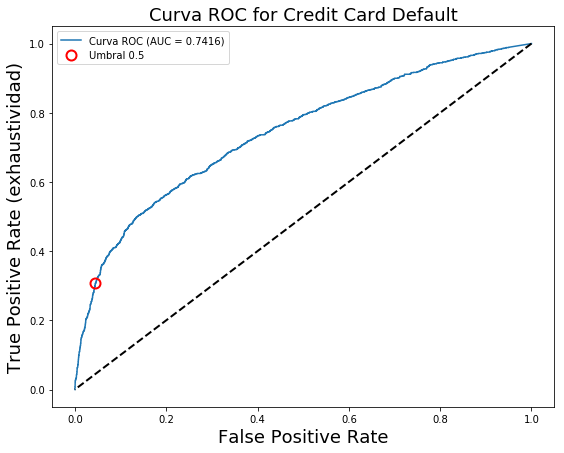

In [56]:
print("Matriz de Confusión - Conjuto Test")
print_binary_confusion_matrix(y_test, modelo_knn.predict(X_test)) #Matriz de confusión
plot_roc(modelo_knn, X_test, y_test) #Dibujamos curva ROC

#Decision Tree Classifier (CART)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Creando el método
dsc = DecisionTreeClassifier(max_depth=3) 

# Entrenando el método
dsc.fit(X_train, y_train)

# Haciendo nuestra predicción con data de prueba
predicciones = dsc.predict(X_val)

# Calculando nuestra presición
accuracy_score(y_true = y_val, y_pred = predicciones)

0.818

<h2>Mejorando el rendimiento a través de la selección de parámetros y valores óptimos</h2>

<h4>* GridSearchCV incluye validación cruzada en su algoritmo</h4>

In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

# Parámetros especificados en: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {
    'max_depth': np.arange(3, 10),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes': [5,10,20,100],
    'min_samples_split': [2, 5, 10, 20],
    'class_weight' : ['balanced']
  }

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, 
                         scoring= 'accuracy', verbose = 1, n_jobs = -1)

# Entrenando el método
grid_tree.fit(X_train, y_train)

# Mostramos el mejor estimador
mejor_estimador = grid_tree.best_estimator_
print(grid_tree.best_estimator_)

# Mostrar la mejor presición alcanzada
print(np.abs(grid_tree.best_score_))

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.7683333333333333


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  2.0min finished


<h4>Usando  el mejor estimador para entrenar nuevamente el modelo</h4>

In [61]:
#Entrenamiento del módelo considerando el mejor estimador
#Entrenamos con train+val
modelo_cart = mejor_estimador
modelo_cart.fit(X_trainval, y_trainval)
predicciones = modelo_cart.predict(X_trainval)
accuracy_score(y_true = y_trainval, y_pred = predicciones)

0.766375

Matriz de Confusión - Conjuto Test
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    718 |    579 |
| real  +-----+--------+--------+
|       |  -  |    786 |   3917 |
+-------+-----+--------+--------+
Exactitud     : 0.772
Precisión     : 0.477
Exhaustividad : 0.554



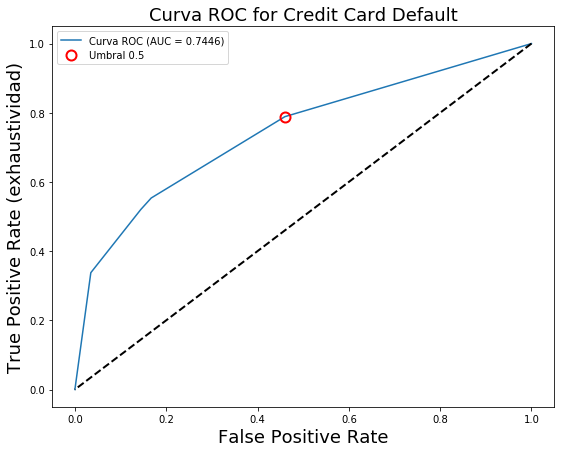

In [62]:
#REsultados con Test
print("Matriz de Confusión - Conjuto Test")
print_binary_confusion_matrix(y_test, modelo_cart.predict(X_test)) #Matriz de confusión
plot_roc(modelo_cart, X_test, y_test) #Dibujamos curva ROC

# Red neuronal

In [63]:
#Instalamos la librería TensorFlow 2.0
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 1.2MB/s 
     |████████████████████████████████| 3.1MB 32.8MB/s 
     |████████████████████████████████| 501kB 44.2MB/s 
  Found existing installation: tensorflow 1.14.0rc1
    Uninstalling tensorflow-1.14.0rc1:
      Successfully uninstalled tensorflow-1.14.0rc1


In [0]:
#Función para graficar la curva ROC
def plot_rn(modelo, x_test, y_test):
  #probabilidades_test = modelo.predict_proba(x_test)
  y_capa_salida_red = clasificador_red_neuronal.predict(x=X_test)
  probabilidades_test = np.argmax(y_capa_salida_red,axis=1)
  #print ('Probabilidad de la clase negativa y de la clase positiva :')
  #print (probabilidades_test)
  fpr, tpr, umbrales = metrics.roc_curve(y_test, probabilidades_test[:,1])
  auc_roc = metrics.roc_auc_score(y_test, probabilidades_test[:,1])

  plt.figure(figsize=[9,7])
  plt.rcParams.update({'font.size': 10})
  plt.plot(fpr, tpr, label= ("Curva ROC (AUC = %.4f)" % auc_roc) )

  plt.xlabel("False Positive Rate", fontsize=18)
  plt.ylabel("True Positive Rate (exhaustividad)", fontsize=18)
  plt.title(("Curva ROC for Credit Card Default"), fontsize=18)
  plt.plot([1,0], [1,0], 'k--', linewidth=2)

  # ubicamos el punto más cercano a 0.5
  umbral_05 = np.argmin(np.abs(umbrales - 0.5))
  plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
           label="Umbral 0.5", fillstyle="none", c='r', mew=2)
  plt.legend(loc='best', numpoints = 1)
  plt.show()

## Modelo

In [0]:
import tensorflow as tf
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [66]:
clasificador_red_neuronal = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train[0].shape)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

clasificador_red_neuronal.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = clasificador_red_neuronal.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

W0617 01:44:30.970839 140358383056768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


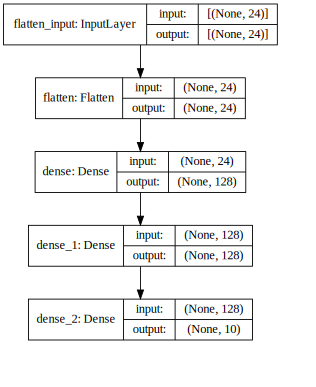

In [67]:
#Visualización del modelo
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(clasificador_red_neuronal, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

## Evaluar el modelo

In [68]:
#Data de Validación
clasificador_red_neuronal.evaluate(X_val, y_val)

6000/6000 [==============================] - 0s 32us/sample - loss: 2.6186 - accuracy: 0.7335


[2.6186142590840658, 0.7335]

In [69]:
#Data de Test
clasificador_red_neuronal.evaluate(X_test, y_test)

6000/6000 [==============================] - 0s 26us/sample - loss: 2.7224 - accuracy: 0.7282


[2.722376425743103, 0.72816664]

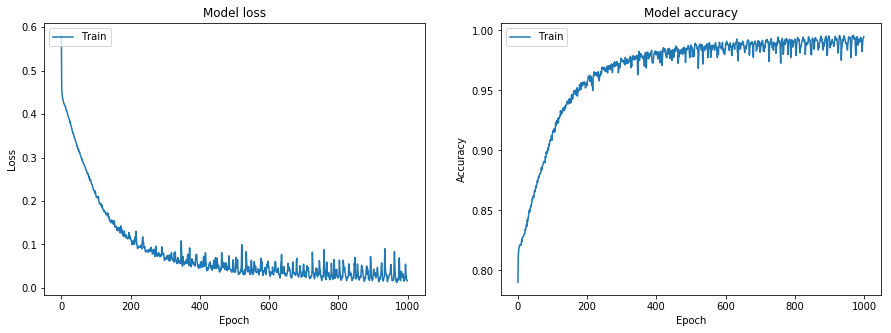

In [70]:
# Adaptado de: https://keras.io/visualization/

plt.figure(figsize=(15,5))
plt.tight_layout()

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Conjunto de Test:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    516 |    781 |
| real  +-----+--------+--------+
|       |  -  |    850 |   3853 |
+-------+-----+--------+--------+
Exactitud     : 0.728
Precisión     : 0.378
Exhaustividad : 0.398



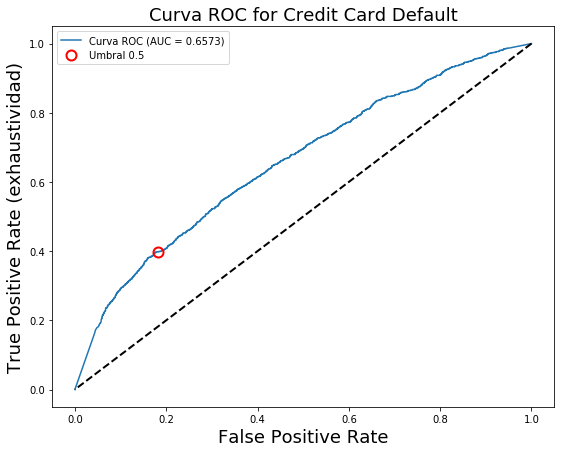

In [71]:
y_capa_salida_red = clasificador_red_neuronal.predict(x=X_test)
predicciones = np.argmax(y_capa_salida_red,axis=1)

print('Conjunto de Test:')
print_binary_confusion_matrix(y_test, predicciones)
plot_roc(clasificador_red_neuronal, X_test, y_test)

# Comparativo entre modelos

In [72]:
print(modelo_lr) #Regresión logistica
print(modelo_knn)
print(modelo_cart)
print(clasificador_red_neuronal)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


**Dibujamos las Curva ROC de los 4 modelos entrenados y usando los resultados obtenidos para el conjunto Test.**


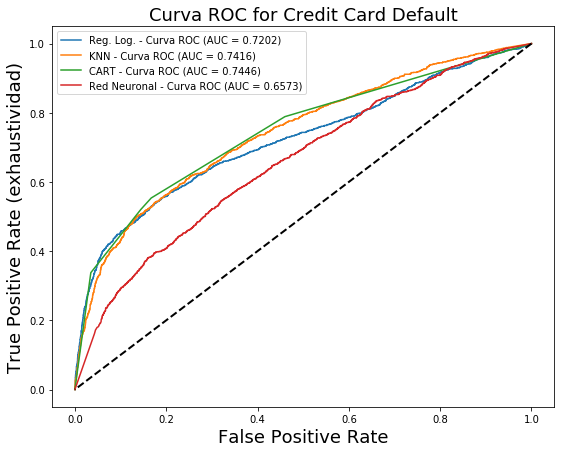

In [78]:
plt.figure(figsize=[9,7])
plt.rcParams.update({'font.size': 10})

prob = modelo_lr.predict_proba(X_test)
fpr, tpr, umbrales = metrics.roc_curve(y_test, prob[:,1])
auc_roc = metrics.roc_auc_score(y_test, prob[:,1])
plt.plot(fpr, tpr, label= ("Reg. Log. - Curva ROC (AUC = %.4f)" % auc_roc) )

prob = modelo_knn.predict_proba(X_test)
fpr, tpr, umbrales = metrics.roc_curve(y_test, prob[:,1])
auc_roc = metrics.roc_auc_score(y_test, prob[:,1])
plt.plot(fpr, tpr, label= ("KNN - Curva ROC (AUC = %.4f)" % auc_roc) )

prob = modelo_cart.predict_proba(X_test)
fpr, tpr, umbrales = metrics.roc_curve(y_test, prob[:,1])
auc_roc = metrics.roc_auc_score(y_test, prob[:,1])
plt.plot(fpr, tpr, label= ("CART - Curva ROC (AUC = %.4f)" % auc_roc) )

prob = clasificador_red_neuronal.predict_proba(X_test)
fpr, tpr, umbrales = metrics.roc_curve(y_test, prob[:,1])
auc_roc = metrics.roc_auc_score(y_test, prob[:,1])
plt.plot(fpr, tpr, label= ("Red Neuronal - Curva ROC (AUC = %.4f)" % auc_roc) )

plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate (exhaustividad)", fontsize=18)
plt.title(("Curva ROC for Credit Card Default"), fontsize=18)
plt.plot([1,0], [1,0], 'k--', linewidth=2)

plt.legend(loc='best', numpoints = 1)
plt.show()

El modelo CART presenta un AUC mayor sobre los demás modelos (0.7446) resultando ser el mejor estimador en cuanto a exhaustividad para el presente estudio de morosidad de clientes.